# Model Development For predicting Kettle Levels

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = './LNG-DATA.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,LNG Flow,LNG Rundown Temperature,MR Operating Margin,PR Operating Margin,MR Compressor Suction Pressure,MCHE Warm bypass Temperature,MR return Temperature,MR Expander inlet Temperature,LNG Shell Temp Top Bundle,...,Natural Gas temp at MCHE warm bundle,Low Pressure Propane kettle level,Medium Pressure Propane/Natural Gas kettle level,High Pressure Propane/Natural Gas kettle level,High High Pressure Propane/Mixed Refrigerant kettle level,High Pressure Propane/Mixed Refrigerant kettle level,Medium Pressure Propane/Mixed Refrigerant kettle level,Low Pressure Propane/Mixed Refrigerant kettle level,MCHE Warm bypass temperature,Natural Gas Warm Bundle to scrub column
0,36328,12470.894531,-145.712891,5.215329,5.215329,2.730273,-42.124023,-34.738281,-121.396484,0.727539,...,-32.703125,69.798828,70.355469,69.316406,71.503906,72.011719,71.683594,62.857422,-42.124023,-53.886719
1,36329,12109.980469,-145.844727,4.203972,4.203972,2.740625,-44.075195,-34.828125,-120.605469,0.693359,...,-32.910156,70.337891,71.156250,72.058594,72.187500,71.443359,70.917969,62.437500,-44.075195,-53.781250
2,36330,12578.753906,-145.966797,4.852132,4.852132,2.710742,-41.948242,-36.542969,-121.542969,0.742188,...,-32.414062,69.833984,69.199219,68.835938,71.998047,71.568359,72.640625,63.259766,-41.948242,-55.460938
3,36331,11478.726562,-145.561523,13.105408,13.523663,2.537109,-44.016602,-36.480469,-122.675781,0.561523,...,-33.824219,69.722656,68.837891,70.060547,72.734375,72.949219,74.408203,65.121094,-44.016602,-54.972656
4,36332,11518.482422,-145.175781,18.634928,16.372524,2.546680,-44.965820,-37.191406,-123.364258,0.634766,...,-35.625000,69.921875,70.478516,71.187500,73.919922,72.933594,76.076172,62.156250,-44.965820,-53.632812


In [3]:
df.drop('Unnamed: 0', axis= 1, inplace=True)

In [4]:
df.columns

Index(['LNG Flow', 'LNG Rundown Temperature', 'MR Operating Margin',
       'PR Operating Margin', 'MR Compressor Suction Pressure',
       'MCHE Warm bypass Temperature', 'MR return Temperature',
       'MR Expander inlet Temperature', 'LNG Shell Temp Top Bundle',
       'LMR JT Valve Valve Opening', 'MCHE Cold bundle dp',
       'Volumetric MR Flow to MR comp. discharge', 'HMR Flow ', 'HMR/MR Ratio',
       'LNG Flow Ex MCHE', 'MCHE Warm Bypass Temperature', 'MR IGV Position',
       'MR Vessel Level', 'MR Vessel Pressure', 'Percentage Nitrogen in MR',
       'Percentage Methane in MR', 'Percentage Ethane in MR',
       'Percentage Propane in MR', 'Percentage Butane in MR',
       'Nitrogen Make-up flow', 'Methane Make-up flow', 'Ethane Make-up flow',
       'Propane Make-up flow', 'Ambient Condition',
       'Scrub Column inlet Temperature',
       'Natural Gas temp at MCHE warm bundle',
       'Low Pressure Propane kettle level',
       'Medium Pressure Propane/Natural Gas kettle l

In [5]:
col_to_use = [
    'LNG Flow', 'LNG Rundown Temperature', 'Low Pressure Propane kettle level',
       'Medium Pressure Propane/Natural Gas kettle level',
       'High Pressure Propane/Natural Gas kettle level',
       'High High Pressure Propane/Mixed Refrigerant kettle level',
       'High Pressure Propane/Mixed Refrigerant kettle level',
       'Medium Pressure Propane/Mixed Refrigerant kettle level',
       'Low Pressure Propane/Mixed Refrigerant kettle level', 'MR IGV Position','HMR Flow ', 'HMR/MR Ratio', 
    'Percentage Nitrogen in MR', 'Percentage Methane in MR', 'Percentage Ethane in MR', 
    'Percentage Propane in MR', 'Percentage Butane in MR', 'Ambient Condition'
]

In [6]:
df1 = df.loc[:, col_to_use].copy()
df1.head()

,LNG Flow,LNG Rundown Temperature,Low Pressure Propane kettle level,Medium Pressure Propane/Natural Gas kettle level,High Pressure Propane/Natural Gas kettle level,High High Pressure Propane/Mixed Refrigerant kettle level,High Pressure Propane/Mixed Refrigerant kettle level,Medium Pressure Propane/Mixed Refrigerant kettle level,Low Pressure Propane/Mixed Refrigerant kettle level,MR IGV Position,HMR Flow,HMR/MR Ratio,Percentage Nitrogen in MR,Percentage Methane in MR,Percentage Ethane in MR,Percentage Propane in MR,Percentage Butane in MR,Ambient Condition
0,12470.894531,-145.712891,69.798828,70.355469,69.316406,71.503906,72.011719,71.683594,62.857422,77.762802,18679.066406,5.310718,3.646484,42.500000,43.532619,10.102832,0.125508,33.207268
1,12109.980469,-145.844727,70.337891,71.156250,72.058594,72.187500,71.443359,70.917969,62.437500,77.999893,18802.667969,5.283063,3.659180,42.519924,43.567482,10.041308,0.124922,33.207268
2,12578.753906,-145.966797,69.833984,69.199219,68.835938,71.998047,71.568359,72.640625,63.259766,77.957260,18743.687500,5.322514,3.625488,42.646095,43.582424,9.938086,0.124023,32.043064
3,11478.726562,-145.561523,69.722656,68.837891,70.060547,72.734375,72.949219,74.408203,65.121094,72.290688,17428.503906,6.037915,3.590332,42.380470,43.839748,9.975683,0.124102,31.496241
4,11518.482422,-145.175781,69.921875,70.478516,71.187500,73.919922,72.933594,76.076172,62.156250,72.255318,16420.748047,6.156987,3.558594,42.609573,43.771683,9.854004,0.124414,31.496241


In [10]:
for (i, j) in enumerate(df1.columns):
    print(f"{i} --> {j}", end= ", ")

0 --> LNG Flow, 1 --> LNG Rundown Temperature, 2 --> Low Pressure Propane kettle level, 3 --> Medium Pressure Propane/Natural Gas kettle level, 4 --> High Pressure Propane/Natural Gas kettle level, 5 --> High High Pressure Propane/Mixed Refrigerant kettle level, 6 --> High Pressure Propane/Mixed Refrigerant kettle level, 7 --> Medium Pressure Propane/Mixed Refrigerant kettle level, 8 --> Low Pressure Propane/Mixed Refrigerant kettle level, 9 --> MR IGV Position, 10 --> HMR Flow , 11 --> HMR/MR Ratio, 12 --> Percentage Nitrogen in MR, 13 --> Percentage Methane in MR, 14 --> Percentage Ethane in MR, 15 --> Percentage Propane in MR, 16 --> Percentage Butane in MR, 17 --> Ambient Condition, 

In [11]:
df_input = df1.iloc[:, 9:]
df_target = df1.iloc[:, :9]

In [23]:
for (i, j) in enumerate(df_target.columns):
    print(f"{i} --> {j}", end= ", ")

0 --> LNG Flow, 1 --> LNG Rundown Temperature, 2 --> Low Pressure Propane kettle level, 3 --> Medium Pressure Propane/Natural Gas kettle level, 4 --> High Pressure Propane/Natural Gas kettle level, 5 --> High High Pressure Propane/Mixed Refrigerant kettle level, 6 --> High Pressure Propane/Mixed Refrigerant kettle level, 7 --> Medium Pressure Propane/Mixed Refrigerant kettle level, 8 --> Low Pressure Propane/Mixed Refrigerant kettle level, 

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, test_size = 0.25, random_state= 10)

In [24]:
def pipe_reg_multi(estimators, X, y, X_test, y_test):
    # Create an empty dictionary to collect prediction values
    y_test_predict = dict()
    y_error = dict()
    
    for name, estimator in estimators.items():
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        
        wrapper = RegressorChain(estimator, order=[2, 3, 4, 5, 6, 7, 8, 1, 0])
        
        pipe = Pipeline(
            [('scalar', StandardScaler()),
            ('regressor', wrapper)]
        )
        
        # evaluate the model and collect the scores
        n_scores = cross_val_score(pipe, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
        
        # force the scores to be positive
        n_scores = absolute(n_scores)
        # summarize performance
        print(f'{name}-->MAE: {mean(n_scores):.4f}, {std(n_scores):.4f}', end = " ")
        
        # fit model
        pipe.fit(X, y)
        
        # predict
        y_test_predict[name] = pipe.predict(X_test)
        print(f", R2-score = {r2_score(y_test, y_test_predict[name]):.4f}")
        
        # calculate mse
        y_error[name] = mean_squared_error(y_test, y_test_predict[name])
        
    return y_test_predict, y_error


In [25]:
from numpy import absolute, mean, std

# import estimators
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# for optimization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain

# pipeline for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# prepare a dictionary of estimators
ESTIMATORS = {
    "Linear Regression": LinearRegression(),
    "K-neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(max_depth=2, random_state=0),
}

In [27]:
y_test_predict, y_error = pipe_reg_multi(ESTIMATORS, X_train, y_train, X_test, y_test)

Linear Regression-->MAE: 54.9918, 1.0008 , R2-score = 0.5259
K-neighbors-->MAE: 42.4947, 1.4732 , R2-score = 0.9109
Decision Tree-->MAE: 29.6158, 0.8742 , R2-score = 0.9023
Random Forest-->MAE: 71.2929, 1.1275 , R2-score = 0.7219


|Algorithm|R2-score|
|------|------|
|Linear Regressor|0.5259|
|K-neighbors|0.9109|
|Decision Tree|0.9023|
|Random Forest|0.7219|

In [28]:
y_test_predict.keys()

dict_keys(['Linear Regression', 'K-neighbors', 'Decision Tree', 'Random Forest'])

In [30]:
y_test_predict['K-neighbors']

(8006, 9)

In [40]:
y_kn = pd.DataFrame(y_test_predict['K-neighbors'], columns=y_test.columns)

In [41]:
y_dt = pd.DataFrame(y_test_predict['Decision Tree'], columns=y_test.columns)

In [34]:
import matplotlib.pyplot as plt

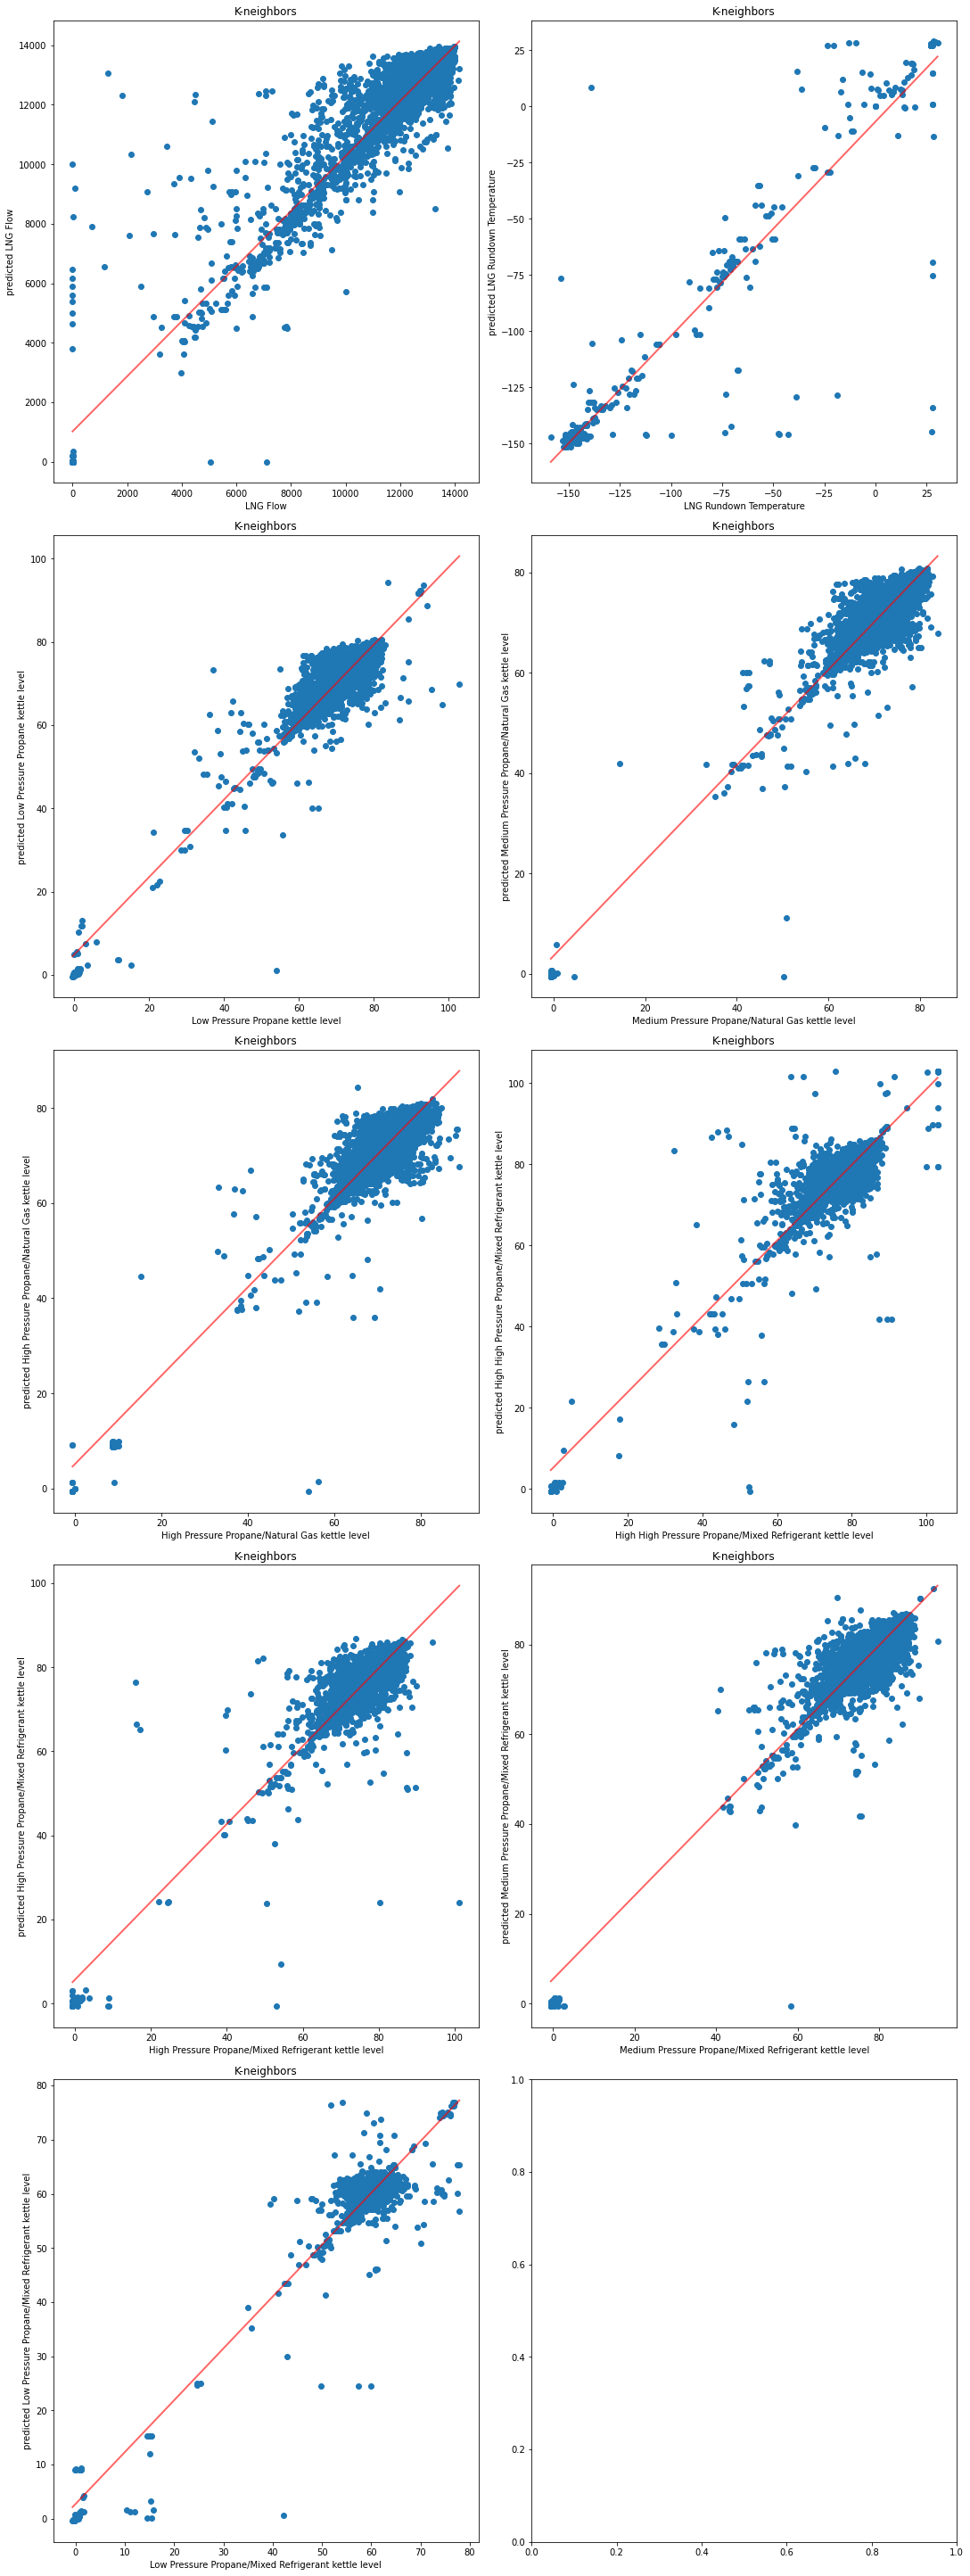

In [50]:
fig, axes = plt.subplots(5, 2, figsize = (15, 40),  constrained_layout = True)
col = 0
for i in range(5):
    for j in range(2):
        if col == 9:
            break
        axes[i,j].scatter(y_test.iloc[:, col], y_test_predict['K-neighbors'][:, col])
        b, a = np.polyfit(y_test.iloc[:, col], y_test_predict['K-neighbors'][:, col], deg=1)
        min = y_test.iloc[:, col].min()
        max = y_test.iloc[:, col].max()
        xseq = np.linspace(min, max, num=1000)

        # Plot regression line
        axes[i, j].plot(xseq, a + b * xseq, color="red", lw=2, alpha=0.6)
        
        
        axes[i, j].set_title('K-neighbors')
        axes[i, j].set_xlabel(f"{y_test.columns[col]}")
        axes[i, j].set_ylabel(f"predicted {y_test.columns[col]}")
        col+=1

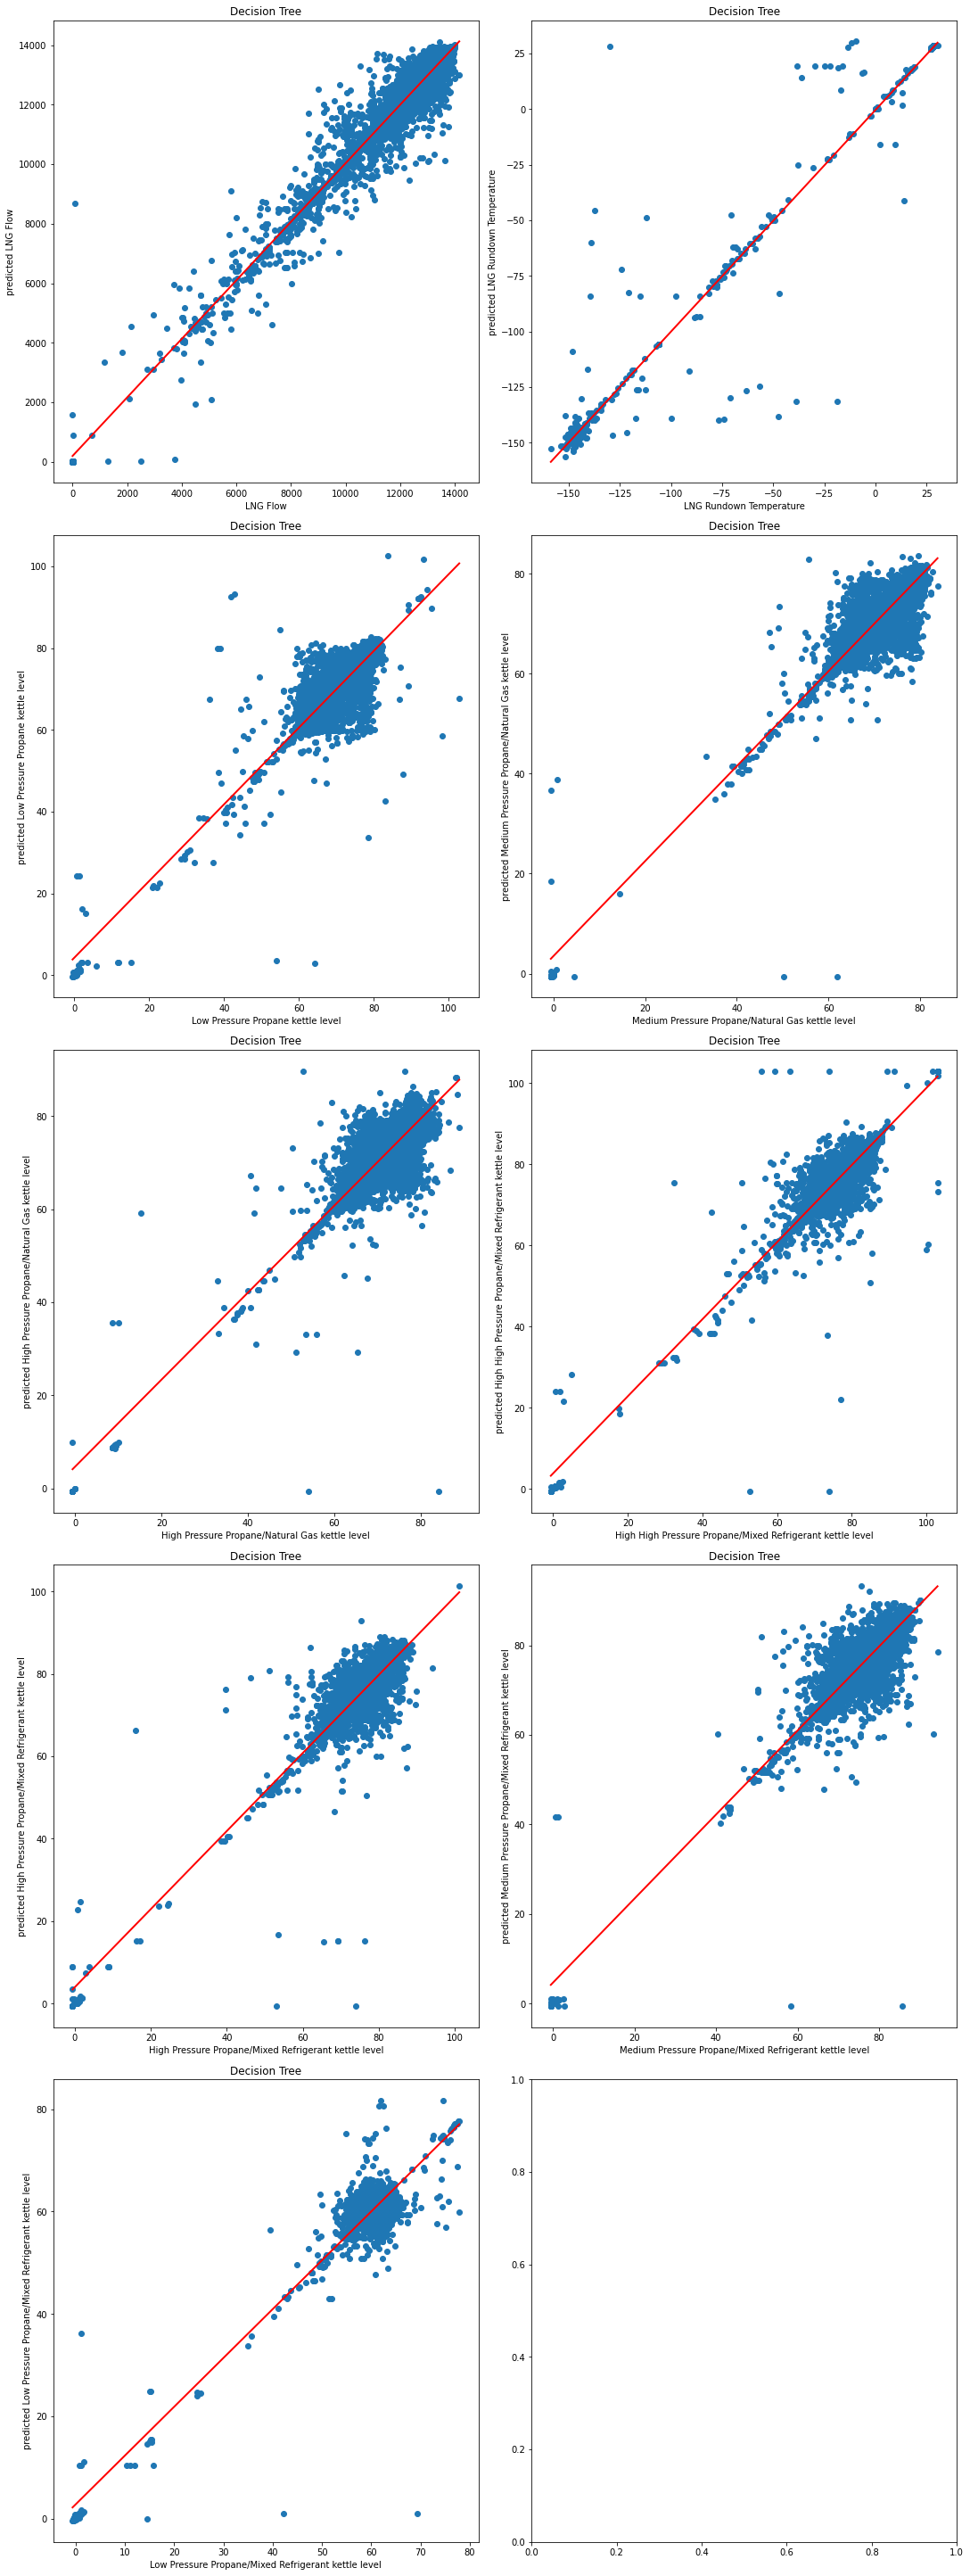

In [49]:
fig, axes = plt.subplots(5, 2, figsize = (15, 40),  constrained_layout = True)
col = 0
for i in range(5):
    for j in range(2):
        if col == 9:
            break
        axes[i,j].scatter(y_test.iloc[:, col], y_test_predict['Decision Tree'][:, col])
        b, a = np.polyfit(y_test.iloc[:, col], y_test_predict['Decision Tree'][:, col], deg=1)
        min = y_test.iloc[:, col].min()
        max = y_test.iloc[:, col].max()
        xseq = np.linspace(min, max, num=1000)

        # Plot regression line
        axes[i, j].plot(xseq, a + b * xseq, color="red", lw=2)
        axes[i, j].set_title('Decision Tree')
        axes[i, j].set_xlabel(f"{y_test.columns[col]}")
        axes[i, j].set_ylabel(f"predicted {y_test.columns[col]}")
        col+=1